In [ ]:
import numpy as np
import pandas as pd

train = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Тинькофф ML/08. Feature Engineering/train.csv')
test = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Тинькофф ML/08. Feature Engineering/test.csv')

In [ ]:
train.head()

,Id,bathrooms,bedrooms,building_id,created,description,display_address,features,latitude,listing_id,longitude,manager_id,photos,price,street_address,TARGET
0,57094,1.0,3,0,2016-05-19 18:06:27,A FABULOUS 3BR IN MIDTOWN WEST! PERFECT APAR...,HOW AMAZING IS THIS MIDTOWN WEST STEAL!! NO FE...,"['Laundry In Unit', 'No Fee', 'Elevator']",40.7647,7039994,-73.9918,4bdc3d8c1aaa90d997ce2cb77680679b,['https://photos.renthop.com/2/7039994_07be01b...,4495,W 50 & AVE 10,medium
1,33389,1.0,1,9225efdfb57a50bf3ec17ebab082f94a,2016-06-16 02:01:49,Renovated Kitchen and Bathroom!,55 River Drive South,"['Dogs Allowed', 'Cats Allowed', 'No Fee']",40.7275,7166774,-74.0322,e5808a5e6cc13988fe596704428d38d5,['https://photos.renthop.com/2/7166774_03cf63a...,2570,55 River Drive South,medium
2,60458,1.0,0,320de7d3cc88e50a7fbbcfde1e825d21,2016-05-04 02:42:50,RARE AND BEST DEAL ON THE MARKET!!!! PERFECT S...,W 77 Street,"['Elevator', 'Hardwood Floors']",40.7798,6962716,-73.9751,d69d4e111612dd12ef864031c1148543,['https://photos.renthop.com/2/6962716_ec7f56f...,1795,22 W 77 Street,low
3,53048,1.0,2,ce6d18bf3238e668b2bf23f4110b7b67,2016-05-12 05:57:56,Newly renovated flex 2 apartment offers the ne...,John Street,"['Swimming Pool', 'Doorman', 'Elevator', 'Fitn...",40.7081,7002458,-74.0065,e6472c7237327dd3903b3d6f6a94515a,['https://photos.renthop.com/2/7002458_93f4010...,3400,100 John Street,low
4,592,1.0,3,fee4d465932160318364d9d48d272879,2016-06-16 06:06:15,LOW FEE apartments do not come around like thi...,West 16th Street,"['Laundry in Building', 'Laundry in Unit', 'Di...",40.7416,7170465,-74.0025,6fba9b3a8327c607b8b043716efee684,['https://photos.renthop.com/2/7170465_9c3f173...,5695,321 West 16th Street,low


In [ ]:
test.head()

,Id,bathrooms,bedrooms,building_id,created,description,display_address,features,latitude,listing_id,longitude,manager_id,photos,price,street_address
0,low,2.0,3,87c4e08083ac83618dd9fdbf849331fe,2016-06-21 03:21:59,Rent listed is net effective after one month f...,E 77 St.,"['Pre-War', 'Laundry in Unit', 'Dishwasher', '...",40.7716,7189305,-73.9544,e6472c7237327dd3903b3d6f6a94515a,['https://photos.renthop.com/2/7189305_f47ed5c...,4675,339 E 77 St.
1,low,1.0,2,850c3d4412aebb3335273ed95f3e4bd4,2016-06-11 03:47:06,A FABULOUS 2BR IN THE UPPER EAST SIDE! PERFECT...,E 112 Street,[],40.7944,7140670,-73.9401,3e9f0fa34d67e5d61aae56776ecb8cee,['https://photos.renthop.com/2/7140670_6c5824f...,2100,252 E 112 Street
2,low,1.0,2,84ddf917a091828ab9baedc0c926470e,2016-04-17 02:45:19,This is a great true 2 bedroom in a prime Midt...,Ninth Avenue,"['Dogs Allowed', 'Cats Allowed']",40.7650,6886239,-73.9882,10b1ae0a38d50b7ba0cee612d14af9eb,['https://photos.renthop.com/2/6886239_533bbee...,2800,783 Ninth Avenue
3,high,2.0,3,315a2f868a195b076e5be73411110da2,2016-05-07 11:44:35,Brand new custom renovation in beautiful three...,East 12th street,"['Laundry In Unit', 'No Fee', 'Washer/Dryer in...",40.7288,6981146,-73.9808,e9920062e07ee893c10e38d0259665b0,['https://photos.renthop.com/2/6981146_f4a7400...,5500,186 Avenue B
4,medium,1.0,3,9b525bacc8d294728c35f27c04e22f46,2016-06-24 07:33:26,"Welcome Home! Located on a Prime UWS Block, Ba...",West 86th&Columbus,"['Private Outdoor Space', 'Elevator', 'Laundry...",40.7864,7210864,-73.9713,6d389fbe372d4d30b17733caa9370f95,['https://photos.renthop.com/2/7210864_e8528f4...,3995,47 West 86th street


Что-то мне подсказывает, что TARGET здесь вместо айдишника закинули 🤔

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34546 entries, 0 to 34545
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Id               34546 non-null  int64  
 1   bathrooms        34546 non-null  float64
 2   bedrooms         34546 non-null  int64  
 3   building_id      34546 non-null  object 
 4   created          34546 non-null  object 
 5   description      33509 non-null  object 
 6   display_address  34458 non-null  object 
 7   features         34546 non-null  object 
 8   latitude         34546 non-null  float64
 9   listing_id       34546 non-null  int64  
 10  longitude        34546 non-null  float64
 11  manager_id       34546 non-null  object 
 12  photos           34546 non-null  object 
 13  price            34546 non-null  int64  
 14  street_address   34542 non-null  object 
 15  TARGET           34546 non-null  object 
dtypes: float64(3), int64(4), object(9)
memory usage: 4.2+ MB


In [ ]:
# поменяем типы данных
train['created'] = pd.to_datetime(train['created'], infer_datetime_format=True)
train['bathrooms'] = train['bathrooms'].apply(lambda x: int(x))

In [ ]:
test['created'] = pd.to_datetime(test['created'], infer_datetime_format=True)
test['bathrooms'] = test['bathrooms'].apply(lambda x: int(x))

In [ ]:
# попробуем выкинуть текстовые признаки и ID
train1 = train.drop(['photos', 'Id', 'manager_id', 'building_id', 'listing_id', 'description', 'display_address', 'street_address', 'features'], axis=1)
test1 = test.drop(['photos', 'Id', 'manager_id', 'building_id', 'listing_id', 'description', 'display_address', 'street_address', 'features'], axis=1)

In [ ]:
train1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34546 entries, 0 to 34545
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   bathrooms  34546 non-null  int64         
 1   bedrooms   34546 non-null  int64         
 2   created    34546 non-null  datetime64[ns]
 3   latitude   34546 non-null  float64       
 4   longitude  34546 non-null  float64       
 5   price      34546 non-null  int64         
 6   TARGET     34546 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(3), object(1)
memory usage: 1.8+ MB


In [ ]:
# добавим новые признаки
train1['price_per_room'] = train1.price / (train1.bedrooms + 1)
train1['hour'] = train1.created.dt.hour
train1['day'] = train1.created.dt.day
train1['month'] = train1.created.dt.month
train1['weekday'] = train1.created.dt.weekday
train1['year'] = train1.created.dt.year
train1 = train1.drop('created', axis=1)

In [ ]:
test1['price_per_room'] = test1.price / (test1.bedrooms + 1)
test1['hour'] = test1.created.dt.hour
test1['day'] = test1.created.dt.day
test1['month'] = test1.created.dt.month
test1['weekday'] = test1.created.dt.weekday
test1['year'] = test1.created.dt.year
test1 = test1.drop('created', axis=1)

In [ ]:
train1.head()

,bathrooms,bedrooms,latitude,longitude,price,TARGET,price_per_room,hour,day,month,weekday,year
0,1,3,40.7647,-73.9918,4495,medium,1123.750000,18,19,5,3,2016
1,1,1,40.7275,-74.0322,2570,medium,1285.000000,2,16,6,3,2016
2,1,0,40.7798,-73.9751,1795,low,1795.000000,2,4,5,2,2016
3,1,2,40.7081,-74.0065,3400,low,1133.333333,5,12,5,3,2016
4,1,3,40.7416,-74.0025,5695,low,1423.750000,6,16,6,3,2016


In [ ]:
test1.head()

,bathrooms,bedrooms,latitude,longitude,price,price_per_room,hour,day,month,weekday,year
0,2,3,40.7716,-73.9544,4675,1168.750000,3,21,6,1,2016
1,1,2,40.7944,-73.9401,2100,700.000000,3,11,6,5,2016
2,1,2,40.7650,-73.9882,2800,933.333333,2,17,4,6,2016
3,2,3,40.7288,-73.9808,5500,1375.000000,11,7,5,5,2016
4,1,3,40.7864,-73.9713,3995,998.750000,7,24,6,4,2016


In [ ]:
train1.year.value_counts()

2016    34546
Name: year, dtype: int64

In [ ]:
train1 = train1.drop('year', axis=1)
test1 = test1.drop('year', axis=1)

In [ ]:
X = train1.drop('TARGET', axis=1)
y = train1.TARGET

In [ ]:
# from sklearn.preprocessing import MinMaxScaler
# scaler = MinMaxScaler()

# X = pd.DataFrame(scaler.fit_transform(train1.drop('TARGET', axis=1)))
# test1 = pd.DataFrame(scaler.transform(test1))
# y = train1.TARGET

In [ ]:
for i in X.columns:
  X[i] = (X[i] - X[i].mean()) / X[i].std()
for j in test1.columns:
  test1[j] = (test1[j] - test1[j].mean()) / test1[j].std()

In [ ]:
X.head()

,bathrooms,bedrooms,latitude,longitude,price,price_per_room,hour,day,month,weekday
0,-0.413616,1.306653,0.036676,-0.032830,0.023043,-0.059901,3.154762,0.458207,-0.024116,0.046081
1,-0.413616,-0.484283,-0.023107,-0.068678,-0.050133,-0.042531,-0.660693,0.095057,1.190327,0.046081
2,-0.413616,-1.379750,0.060942,-0.018011,-0.079593,0.012406,-0.660693,-1.357543,-0.024116,-0.512877
3,-0.413616,0.411185,-0.054284,-0.045874,-0.018582,-0.058869,0.054705,-0.389143,-0.024116,0.046081
4,-0.413616,1.306653,-0.000447,-0.042324,0.068659,-0.027585,0.293171,0.095057,1.190327,0.046081


In [ ]:
test1.head()

,bathrooms,bedrooms,latitude,longitude,price,price_per_room,hour,day,month,weekday
0,1.579259,1.310878,0.045678,0.002673,0.338606,-0.268117,-0.418579,0.697920,1.205751,-1.088980
1,-0.408712,0.410820,0.079455,0.013766,-0.549587,-0.555797,-0.418579,-0.503024,1.205751,1.164707
2,-0.408712,0.410820,0.035900,-0.023548,-0.308136,-0.412597,-0.657642,0.217542,-1.213431,1.728129
3,1.579259,1.310878,-0.017728,-0.017808,0.623172,-0.141538,1.493928,-0.983402,-0.003840,1.164707
4,-0.408712,1.310878,0.067603,-0.010438,0.104054,-0.372449,0.537674,1.058203,1.205751,0.601285


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

logreg = LogisticRegression()
cross_val_score(logreg, X, y, scoring='accuracy').mean()

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


0.6946968058399885

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

KNN = KNeighborsClassifier()
cross_val_score(KNN, X, y, scoring='accuracy').mean()

0.6543159774609724

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

In [ ]:
acc_scores = []
for iter in np.linspace(50, 1550, 6):
  logreg = LogisticRegression(max_iter = iter)
  logreg.fit(X_train, y_train)
  y_pred = logreg.predict(X_test)
  acc_scores.append((iter, accuracy_score(y_test, y_pred)))
acc_scores

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


[(50.0, 0.6921322690992018),
 (350.0, 0.6924831155161828),
 (650.0, 0.6924831155161828),
 (950.0, 0.6924831155161828),
 (1250.0, 0.6924831155161828),
 (1550.0, 0.6924831155161828)]

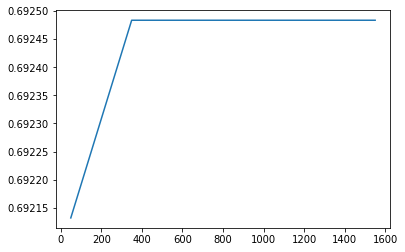

In [ ]:
import matplotlib.pyplot as plt

plt.plot([x[0] for x in acc_scores], [x[1] for x in acc_scores])

In [ ]:
acc_scores = []
for C in np.linspace(0.001, 1, 5):
  logreg = LogisticRegression(max_iter = 350, C = C)
  logreg.fit(X_train, y_train)
  y_pred = logreg.predict(X_test)
  acc_scores.append((C, accuracy_score(y_test, y_pred)))
acc_scores

[(0.001, 0.692219980703447),
 (0.25075, 0.6937987895798614),
 (0.5005, 0.6936233663713709),
 (0.75025, 0.6930970967458995),
 (1.0, 0.6924831155161828)]

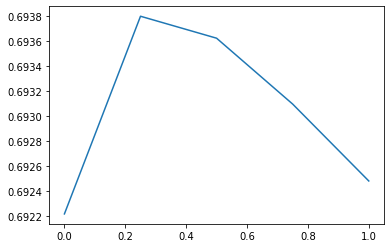

In [ ]:
plt.plot([x[0] for x in acc_scores], [x[1] for x in acc_scores])

In [ ]:
logreg = LogisticRegression(C = 0.25, max_iter=350)
logreg.fit(X, y)
test_pred = logreg.predict(test1)

In [ ]:
sub = pd.read_csv('sample_submission.csv')
sub.TARGET = test_pred
sub.head(10)

,Id,TARGET
0,19477,low
1,29937,high
2,109148,high
3,65728,low
4,33623,low
5,57810,high
6,50217,medium
7,104393,low
8,91380,medium
9,21764,high


In [ ]:
sub.TARGET.value_counts()

low       6907
high      5987
medium    1912
Name: TARGET, dtype: int64

In [ ]:
sub.to_csv('my_submission.csv', index=False)

In [ ]:
!pip install mlxtend

In [ ]:
from sklearn.feature_selection import SequentialFeatureSelector

selector = SequentialFeatureSelector(LogisticRegression(), scoring='accuracy',
                                    direction='forward', n_jobs=-1)

selector.fit(X, y)

SequentialFeatureSelector(estimator=LogisticRegression(), n_jobs=-1,
                          scoring='accuracy')

In [ ]:
X_new = selector.transform(X)
test1_new = selector.transform(test1)

In [ ]:
X_new.shape

(34546, 5)

In [ ]:
logreg = LogisticRegression(C = 0.001, max_iter=100)
logreg.fit(X_new, y)
test_pred = logreg.predict(test1_new)

In [ ]:
sub = pd.read_csv('sample_submission.csv')
sub.TARGET = test_pred
sub.head(10)

,Id,TARGET
0,19477,low
1,29937,low
2,109148,low
3,65728,low
4,33623,low
5,57810,low
6,50217,low
7,104393,low
8,91380,low
9,21764,low


In [ ]:
sub.TARGET.value_counts()

low    14806
Name: TARGET, dtype: int64